In [69]:
import numpy as np
from matplotlib import pyplot as plt

# Data generation

In [92]:
m = 51
x = np.linspace(0,1,m).reshape( (m,1) )
y = 15*x[:] + 5 + np.random.normal(0,0.5,(m,1))
print( "x: {}".format(x.shape) )
print( "y: {}".format(y.shape) )

x: (51, 1)
y: (51, 1)


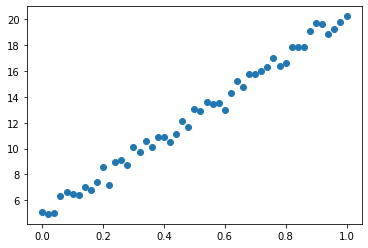

In [94]:
plt.plot(x,y,'o')
plt.show()

### Create augmented X

In [95]:
x_aug = np.hstack(( x.reshape(m,1), np.ones((m,1)) ))
print( x_aug.shape )

(51, 2)


## Initialize Weights

In [198]:
w = np.random.random((2,1))
print( w.shape )

(2, 1)


## Check if we got the math right

In [199]:
y_hat = np.matmul( x_aug, w )
J = (0.5/m) * np.sum( np.power(( y.reshape((m,1)) - y_hat ),2) )

print( "x_aug: {}".format(x_aug.shape) )
print( "y: {}".format(y.shape) )
print( "y_hat: {}".format(y_hat.shape) )
print( "Loss: {}".format(J) )

x_aug: (51, 2)
y: (51, 1)
y_hat: (51, 1)
Loss: 73.70552913983376


# Training

In [200]:
epoch = 1;
err = 0;
lr = 0.001

while( epoch < 5000 ):
    y_hat = np.matmul( x_aug, w )
    J = (0.5/m) * np.sum( np.power(( y.reshape((m,1)) - y_hat ),2) )

    err = np.mean( np.power(y-y_hat,2) )
    if( epoch%500 == 0 ):
        print( "{}: Error {}".format(epoch, err) )

    gradient_10 = -1 * np.average( y-y_hat )
    gradient_20 = -1 * np.average( (y-y_hat)*(x) )
    gradient = np.vstack(( gradient_10, gradient_20 ))

    w -= lr * gradient
    epoch += 1

500: Error 51.299277139128186
1000: Error 18.665837803910264
1500: Error 7.686010120285967
2000: Error 4.061466878261872
2500: Error 2.941160823403937
3000: Error 2.6797435804762437
3500: Error 2.7196812360786167
4000: Error 2.8726201907802045
4500: Error 3.0755460533843255


# Predicting

In [201]:
y_pred = np.matmul( x_aug, w )

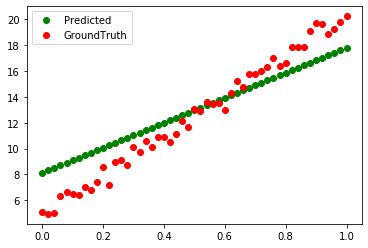

In [204]:
plt.plot( x, y_pred, 'go', label="Predicted")
plt.plot( x, y, 'ro', label="GroundTruth")
plt.legend()
plt.show()